In [1]:
import json
import pickle
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

from inference.sina_plot import sinaplot
from inference.periodic_trends import periodic_trends_plotter
from jp_manuscript_figure_utils import flatten, get_property, get_relative_vals, plot_pca_embedding, plot_pca_embedding_additional

/home/jypeng/miniconda3/envs/Perovskite_ML_Environment/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams["xtick.major.size"] = 4
plt.rcParams["ytick.major.size"] = 4
plt.rcParams["ytick.major.width"] = 2
plt.rcParams["xtick.major.width"] = 2
plt.rcParams['text.usetex'] = False
plt.rc('lines', linewidth=3, color='g')
plt.rcParams.update({'font.size': 16})
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['mathtext.fontset'] = 'dejavusans'

# Main_compositional_dependence

In [3]:
ehull_CGCNN_unrelaxed_test_0 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/test_set_predictions.json")
ehull_CGCNN_unrelaxed_test_1 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_1/test_set_predictions.json")
ehull_CGCNN_unrelaxed_test_2 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_2/test_set_predictions.json")

ehull_e3nn_unrelaxed_test_0 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/test_set_predictions.json")
ehull_e3nn_unrelaxed_test_1 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_1/test_set_predictions.json")
ehull_e3nn_unrelaxed_test_2 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_2/test_set_predictions.json")

ehull_CGCNN_relaxed_test_0 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/test_set_predictions.json")
ehull_CGCNN_relaxed_test_1 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_1/test_set_predictions.json")
ehull_CGCNN_relaxed_test_2 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_2/test_set_predictions.json")

ehull_e3nn_relaxed_test_0 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/test_set_predictions.json")
ehull_e3nn_relaxed_test_1 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_1/test_set_predictions.json")
ehull_e3nn_relaxed_test_2 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_2/test_set_predictions.json")

In [4]:
ehull_CGCNN_unrelaxed_test_true = flatten(ehull_CGCNN_unrelaxed_test_0['dft_e_hull'])
ehull_e3nn_unrelaxed_test_true = flatten(ehull_e3nn_unrelaxed_test_0['dft_e_hull'])

ehull_CGCNN_unrelaxed_test_pred = (flatten(ehull_CGCNN_unrelaxed_test_0.predicted_dft_e_hull) + flatten(ehull_CGCNN_unrelaxed_test_1.predicted_dft_e_hull)+flatten(ehull_CGCNN_unrelaxed_test_2.predicted_dft_e_hull))/3.0
ehull_e3nn_unrelaxed_test_pred = (flatten(ehull_e3nn_unrelaxed_test_0.predicted_dft_e_hull) + flatten(ehull_e3nn_unrelaxed_test_1.predicted_dft_e_hull)+flatten(ehull_e3nn_unrelaxed_test_2.predicted_dft_e_hull))/3.0

ehull_CGCNN_relaxed_test_true = flatten(ehull_CGCNN_relaxed_test_0['dft_e_hull'])
ehull_e3nn_relaxed_test_true = flatten(ehull_e3nn_relaxed_test_0['dft_e_hull'])

ehull_CGCNN_relaxed_test_pred = (flatten(ehull_CGCNN_relaxed_test_0.predicted_dft_e_hull) + flatten(ehull_CGCNN_relaxed_test_1.predicted_dft_e_hull)+flatten(ehull_CGCNN_relaxed_test_2.predicted_dft_e_hull))/3.0
ehull_e3nn_relaxed_test_pred = (flatten(ehull_e3nn_relaxed_test_0.predicted_dft_e_hull) + flatten(ehull_e3nn_relaxed_test_1.predicted_dft_e_hull)+flatten(ehull_e3nn_relaxed_test_2.predicted_dft_e_hull))/3.0

In [5]:
CGCNN_unrelaxed, e3nn_unrelaxed = get_property("dft_e_hull", "unrelaxed")
CGCNN_relaxed, e3nn_relaxed = get_property("dft_e_hull", "relaxed")

dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN_TrainingFraction0.5
dft_e_hull_htvs_data_unrelaxed_CGCNN_TrainingFraction0.25
dft_e_hull_htvs_data_unrelaxed_CGCNN_TrainingFraction0.125
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn_TrainingFraction0.5
dft_e_hull_htvs_data_unrelaxed_e3nn_TrainingFraction0.25
dft_e_hull_htvs_data_unrelaxed_e3nn_TrainingFraction0.125
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN_TrainingFraction0.5
dft_e_hull_htvs_data_relaxed_CGCNN_TrainingFraction0.25
dft_e_hull_htvs_data_relaxed_CGCNN_TrainingFraction0.125
dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn_TrainingFraction0.5
dft_e_hull_htvs_data_relaxed_e3nn_TrainingFraction0.25
dft_e_hull_htvs_data_relaxed_e3nn_TrainingFraction0.125


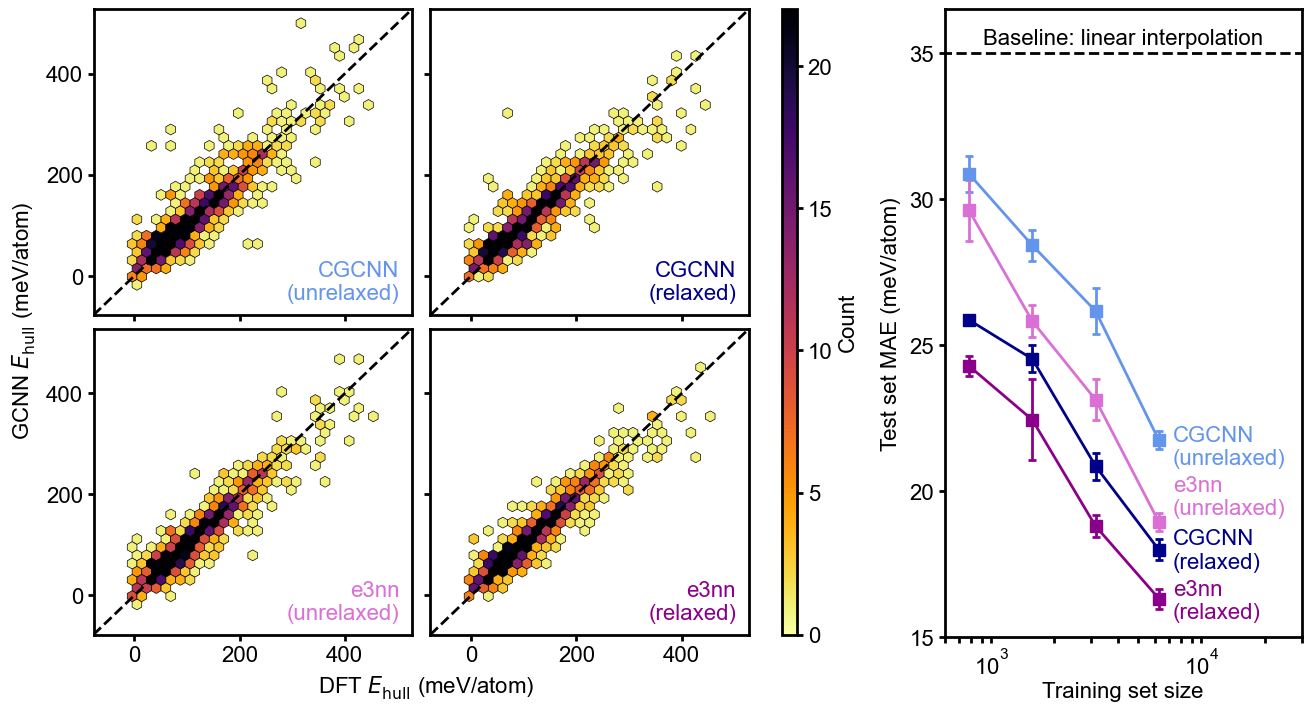

In [6]:
fig = plt.figure(figsize=(13, 7), constrained_layout=True)
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=[2, 1])

axes_l = subfig_l.subplots(nrows=2, ncols=2, sharex=True, sharey=True, gridspec_kw={'left': 0.3})
hex_cmap = 'inferno_r'
hex_gridsize = 30
hex_mincnt = 1
hex_edgecolors = 'black'
hex_linewidths = 0.5
hex_xylim = [-50, 500]
cbar_vmax = 22

axes_l[0][0].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[0][1].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[1][0].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[1][1].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)

axes_l[0][0].hexbin(
    ehull_CGCNN_unrelaxed_test_true*1000, ehull_CGCNN_unrelaxed_test_pred*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

axes_l[0][1].hexbin(
    ehull_e3nn_unrelaxed_test_true*1000, ehull_e3nn_unrelaxed_test_pred*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

axes_l[1][0].hexbin(
    ehull_CGCNN_relaxed_test_true*1000, ehull_CGCNN_relaxed_test_pred*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

hex_example = axes_l[1][1].hexbin(
    ehull_e3nn_relaxed_test_true*1000, ehull_e3nn_relaxed_test_pred*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

axes_l[0][0].text(0.96, 0.05, 'CGCNN\n(unrelaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[0][0].transAxes, color='cornflowerblue')
axes_l[1][0].text(0.96, 0.05, 'e3nn\n(unrelaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[1][0].transAxes, color='orchid')
axes_l[0][1].text(0.96, 0.05, 'CGCNN\n(relaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[0][1].transAxes, color='darkblue')
axes_l[1][1].text(0.96, 0.05, 'e3nn\n(relaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[1][1].transAxes, color='darkmagenta')

subfig_l.colorbar(hex_example, ax=axes_l, label='Count', ticks=np.arange(0, cbar_vmax+1, 5), aspect=40)
subfig_l.supxlabel('DFT $\mathit{E}_{\mathrm{hull}}$ (meV/atom)', x=0.49, fontsize=16)
subfig_l.supylabel('GCNN $\mathit{E}_{\mathrm{hull}}$ (meV/atom)', y=0.55, fontsize=16)

ax_r = subfig_r.subplots(nrows=1, ncols=1)
ax_r.set_xlabel('Training set size', labelpad=2)
ax_r.set_ylabel('Test set MAE (meV/atom)', labelpad=6)
ax_r.set_xscale('log')
ax_r.set_xlim(600, 30000)
ax_r.tick_params(which='minor', length=4, width=2)
ax_r_xticks = np.array([1, 0.5, 0.25, 0.125]) * 6276
ax_r.set_ylim(15, 36.5)
ax_r.set_yticks(np.arange(15, 40, 5))

ax_r.errorbar(ax_r_xticks, CGCNN_unrelaxed[0]*1000, yerr=CGCNN_unrelaxed[1]*1000, fmt='-s', color='cornflowerblue', markersize=8, linewidth=2, capsize=3, capthick=2)
ax_r.errorbar(ax_r_xticks, e3nn_unrelaxed[0]*1000, yerr=e3nn_unrelaxed[1]*1000, fmt='-s', color='orchid', markersize=8, linewidth=2, capsize=3, capthick=2)
ax_r.errorbar(ax_r_xticks, CGCNN_relaxed[0]*1000, yerr=CGCNN_relaxed[1]*1000, fmt='-s', color='darkblue', markersize=8, linewidth=2, capsize=3, capthick=2)
ax_r.errorbar(ax_r_xticks, e3nn_relaxed[0]*1000, yerr=e3nn_relaxed[1]*1000, fmt='-s', color='darkmagenta', markersize=8, linewidth=2, capsize=3, capthick=2)
ax_r.hlines(35, 0, 10**6, color='black', linestyle='--', linewidth=2)

ax_r.text(0.64, 0.275, 'CGCNN\n(unrelaxed)', color='cornflowerblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.64, 0.195, 'e3nn\n(unrelaxed)', color='orchid', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.64, 0.110, 'CGCNN\n(relaxed)', color='darkblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.64, 0.030, 'e3nn\n(relaxed)', color='darkmagenta', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.50, 0.945, 'Baseline: linear interpolation', color='black', fontsize=16, ha='center', transform=ax_r.transAxes)

# plt.tight_layout()
plt.savefig('./figures/Main_compositional_dependence.pdf', bbox_inches='tight')

# Main_ordering_dependence

In [3]:
ehull_CGCNN_unrelaxed_held_B_0 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_1 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_1/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_2 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_2/holdout_set_B_sites_predictions.json")

ehull_e3nn_unrelaxed_held_B_0 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
ehull_e3nn_unrelaxed_held_B_1 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_1/holdout_set_B_sites_predictions.json")
ehull_e3nn_unrelaxed_held_B_2 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_2/holdout_set_B_sites_predictions.json")

ehull_CGCNN_relaxed_held_B_0 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_B_sites_predictions.json")
ehull_CGCNN_relaxed_held_B_1 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_1/holdout_set_B_sites_predictions.json")
ehull_CGCNN_relaxed_held_B_2 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_2/holdout_set_B_sites_predictions.json")

ehull_e3nn_relaxed_held_B_0 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_B_sites_predictions.json")
ehull_e3nn_relaxed_held_B_1 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_1/holdout_set_B_sites_predictions.json")
ehull_e3nn_relaxed_held_B_2 = pd.read_json("./best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_2/holdout_set_B_sites_predictions.json")

In [4]:
ehull_CGCNN_unrelaxed_held_B_true = flatten(ehull_CGCNN_unrelaxed_held_B_0['dft_e_hull'])
ehull_e3nn_unrelaxed_held_B_true = flatten(ehull_e3nn_unrelaxed_held_B_0['dft_e_hull'])

ehull_CGCNN_unrelaxed_held_B_pred = (flatten(ehull_CGCNN_unrelaxed_held_B_0.predicted_dft_e_hull) + flatten(ehull_CGCNN_unrelaxed_held_B_1.predicted_dft_e_hull)+flatten(ehull_CGCNN_unrelaxed_held_B_2.predicted_dft_e_hull))/3.0
ehull_e3nn_unrelaxed_held_B_pred = (flatten(ehull_e3nn_unrelaxed_held_B_0.predicted_dft_e_hull) + flatten(ehull_e3nn_unrelaxed_held_B_1.predicted_dft_e_hull)+flatten(ehull_e3nn_unrelaxed_held_B_2.predicted_dft_e_hull))/3.0

ehull_CGCNN_relaxed_held_B_true = flatten(ehull_CGCNN_relaxed_held_B_0['dft_e_hull'])
ehull_e3nn_relaxed_held_B_true = flatten(ehull_e3nn_relaxed_held_B_0['dft_e_hull'])

ehull_CGCNN_relaxed_held_B_pred = (flatten(ehull_CGCNN_relaxed_held_B_0.predicted_dft_e_hull) + flatten(ehull_CGCNN_relaxed_held_B_1.predicted_dft_e_hull)+flatten(ehull_CGCNN_relaxed_held_B_2.predicted_dft_e_hull))/3.0
ehull_e3nn_relaxed_held_B_pred = (flatten(ehull_e3nn_relaxed_held_B_0.predicted_dft_e_hull) + flatten(ehull_e3nn_relaxed_held_B_1.predicted_dft_e_hull)+flatten(ehull_e3nn_relaxed_held_B_2.predicted_dft_e_hull))/3.0

In [5]:
diffs_dft = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0, ehull_e3nn_unrelaxed_held_B_0.dft_e_hull)

diffs_e3nn_unrelaxed = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0, ehull_e3nn_unrelaxed_held_B_pred)
diffs_e3nn_relaxed = get_relative_vals(ehull_e3nn_relaxed_held_B_0, ehull_e3nn_relaxed_held_B_pred)

diffs_CGCNN_unrelaxed = get_relative_vals(ehull_CGCNN_unrelaxed_held_B_0, ehull_CGCNN_unrelaxed_held_B_pred)
diffs_CGCNN_relaxed = get_relative_vals(ehull_CGCNN_relaxed_held_B_0, ehull_CGCNN_relaxed_held_B_pred)

In [6]:
print(max(diffs_dft))
print(max(diffs_e3nn_unrelaxed))
print(max(diffs_e3nn_relaxed))
print(max(diffs_CGCNN_unrelaxed))
print(max(diffs_CGCNN_relaxed))

0.16102584520000002
0.13318365066666665
0.1401898439
0.1056770334666667
0.1479246442666667


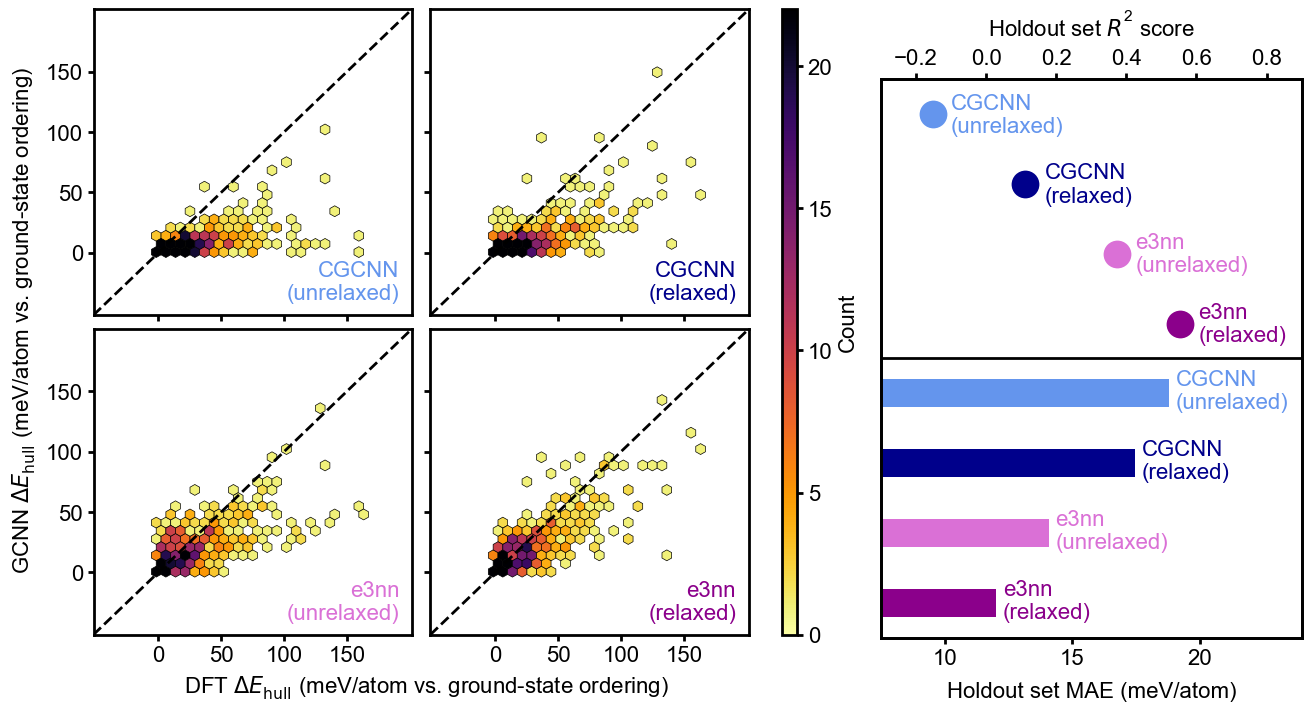

In [7]:
fig = plt.figure(figsize=(13, 7), constrained_layout=True)
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=[2, 1])

axes_l = subfig_l.subplots(nrows=2, ncols=2, sharex=True, sharey=True, gridspec_kw={'left': 0.3})
hex_cmap = 'inferno_r'
hex_gridsize = 30
hex_mincnt = 1
hex_edgecolors = 'black'
hex_linewidths = 0.5
hex_xylim = [-40, 190]
cbar_vmax = 22

axes_l[0][0].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[1][0].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[0][1].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[1][1].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)

axes_l[0][0].hexbin(
    diffs_dft*1000, diffs_CGCNN_unrelaxed*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

axes_l[1][0].hexbin(
    diffs_dft*1000, diffs_e3nn_unrelaxed*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

axes_l[0][1].hexbin(
    diffs_dft*1000, diffs_CGCNN_relaxed*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

hex_example = axes_l[1][1].hexbin(
    diffs_dft*1000, diffs_e3nn_relaxed*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)

axes_l[0][0].text(0.96, 0.05, 'CGCNN\n(unrelaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[0][0].transAxes, color='cornflowerblue')
axes_l[1][0].text(0.96, 0.05, 'e3nn\n(unrelaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[1][0].transAxes, color='orchid')
axes_l[0][1].text(0.96, 0.05, 'CGCNN\n(relaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[0][1].transAxes, color='darkblue')
axes_l[1][1].text(0.96, 0.05, 'e3nn\n(relaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[1][1].transAxes, color='darkmagenta')

axes_l[0][0].set_yticks(np.arange(0, hex_xylim[1], 50))
axes_l[0][0].set_xticks(np.arange(0, hex_xylim[1], 50))
subfig_l.colorbar(hex_example, ax=axes_l, label='Count', ticks=np.arange(0, cbar_vmax+1, 5), aspect=40)
subfig_l.supxlabel('DFT $\mathit{\Delta E}_{\mathrm{hull}}$ (meV/atom vs. ground-state ordering)', x=0.49, fontsize=16)
subfig_l.supylabel('GCNN $\mathit{\Delta E}_{\mathrm{hull}}$ (meV/atom vs. ground-state ordering)', y=0.55, fontsize=16)

ax_r = subfig_r.subplots(nrows=1, ncols=1)
ax_r_yaxis = ax_r.get_yaxis()
ax_r_yaxis.set_visible(False)
ax_r.set_xlabel('Holdout set MAE (meV/atom)', labelpad=9)
ax_r.set_xlim(7.5, 24)
ax_r.set_ylim(-4, 4)
ax_r.set_xticks(np.arange(10, 21, 5))

ax_r.barh(y=-0.5, width=mean_absolute_error(diffs_dft, diffs_CGCNN_unrelaxed)*1000, height=0.4, color='cornflowerblue')
ax_r.barh(y=-1.5, width=mean_absolute_error(diffs_dft, diffs_CGCNN_relaxed)*1000, height=0.4, color='darkblue')
ax_r.barh(y=-2.5, width=mean_absolute_error(diffs_dft, diffs_e3nn_unrelaxed)*1000, height=0.4, color='orchid')
ax_r.barh(y=-3.5, width=mean_absolute_error(diffs_dft, diffs_e3nn_relaxed)*1000, height=0.4, color='darkmagenta')

ax_r_twiny = ax_r.twiny()
ax_r_twiny.set_xlabel('Holdout set $\mathit{R}^2$ score', labelpad=9)
ax_r_twiny.set_xlim(-0.3, 0.9)
ax_r_twiny.set_xticks(np.arange(-0.2, 0.9, 0.2))

ax_r_twiny.plot(r2_score(diffs_dft, diffs_CGCNN_unrelaxed), 3.5, 'o', markersize=20, markeredgecolor='black', markeredgewidth=0, color='cornflowerblue')
ax_r_twiny.plot(r2_score(diffs_dft, diffs_CGCNN_relaxed), 2.5, 'o', markersize=20, markeredgecolor='black', markeredgewidth=0, color='darkblue')
ax_r_twiny.plot(r2_score(diffs_dft, diffs_e3nn_unrelaxed), 1.5, 'o', markersize=20, markeredgecolor='black', markeredgewidth=0, color='orchid')
ax_r_twiny.plot(r2_score(diffs_dft, diffs_e3nn_relaxed), 0.5, 'o', markersize=20, markeredgecolor='black', markeredgewidth=0, color='darkmagenta')

ax_r.hlines(0, 0, 100, color='black', linestyle='-', linewidth=2)

ax_r.text(0.165, 0.905, 'CGCNN\n(unrelaxed)', color='cornflowerblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.390, 0.780, 'CGCNN\n(relaxed)', color='darkblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.605, 0.655, 'e3nn\n(unrelaxed)', color='orchid', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.755, 0.530, 'e3nn\n(relaxed)', color='darkmagenta', fontsize=16, ha='left', transform=ax_r.transAxes)

ax_r.text(0.700, 0.410, 'CGCNN\n(unrelaxed)', color='cornflowerblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.620, 0.285, 'CGCNN\n(relaxed)', color='darkblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.415, 0.160, 'e3nn\n(unrelaxed)', color='orchid', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.290, 0.035, 'e3nn\n(relaxed)', color='darkmagenta', fontsize=16, ha='left', transform=ax_r.transAxes)

# plt.tight_layout()
plt.savefig('./figures/Main_ordering_dependence.pdf', bbox_inches='tight')

# Main_embedding_analysis

In [3]:
path = "inference/James_Scrap/"
with open(path+'entropy_dft_held_out.json', 'r') as fp:
    formula_to_entropy_dft = json.load(fp)

dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn


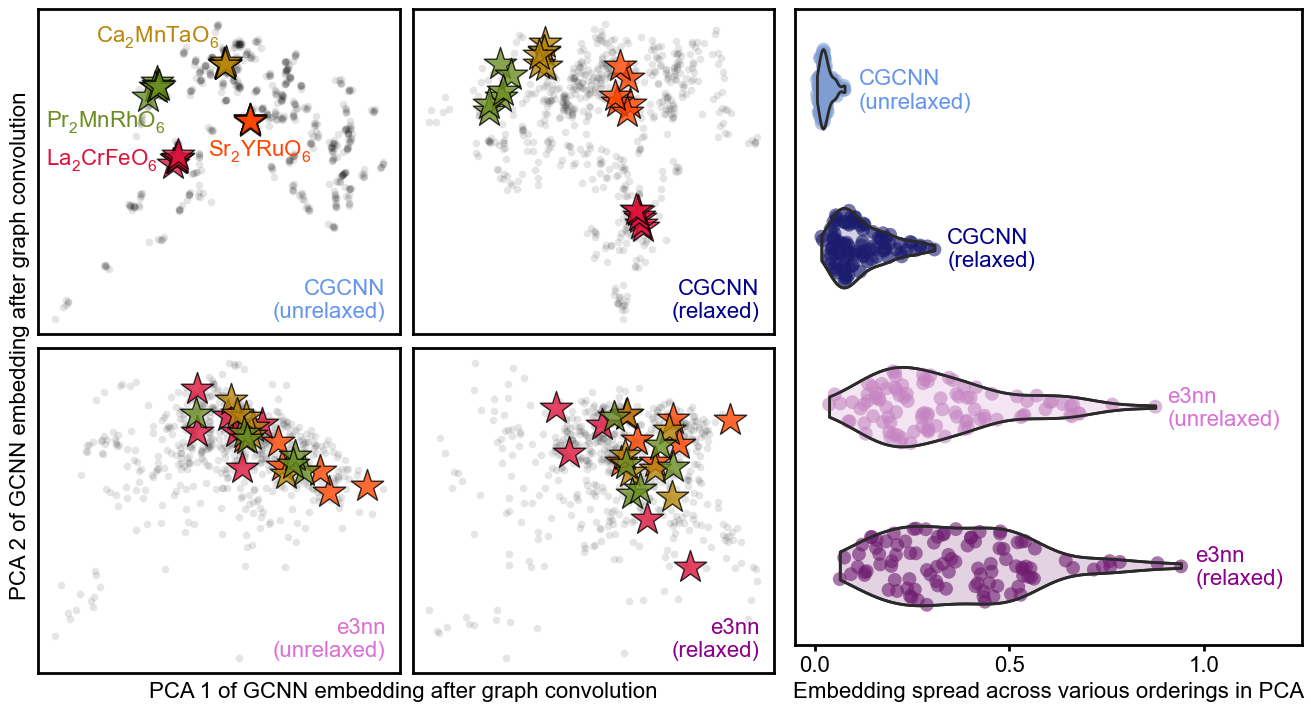

In [5]:
fig = plt.figure(figsize=(13, 7), constrained_layout=True)
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=[1.5, 1])

model_types = ["CGCNN", "e3nn"]
struct_types = ["unrelaxed", "relaxed"]

pca_spread = {}
for model_type in model_types:
    pca_spread[model_type] = {}
    for struct_type in struct_types:
        pca_spread[model_type][struct_type] = None

axes_l = subfig_l.subplots(nrows=2, ncols=2, gridspec_kw={'left': 0.3, 'bottom': 0.6, 'hspace': 0.04})
for i in range(2):
    for j in range(2):
        ax_l_yaxis = axes_l[i][j].get_yaxis()
        ax_l_xaxis = axes_l[i][j].get_xaxis()
        ax_l_yaxis.set_visible(False)
        ax_l_xaxis.set_visible(False)
        pca_spread[model_types[i]][struct_types[j]] = plot_pca_embedding(axes_l[i][j], model_types[i], struct_types[j], formula_to_entropy_dft, highlight=True)
        
axes_l[0][0].text(0.96, 0.05, 'CGCNN\n(unrelaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[0][0].transAxes, color='cornflowerblue')
axes_l[1][0].text(0.96, 0.05, 'e3nn\n(unrelaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[1][0].transAxes, color='orchid')
axes_l[0][1].text(0.96, 0.05, 'CGCNN\n(relaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[0][1].transAxes, color='darkblue')
axes_l[1][1].text(0.96, 0.05, 'e3nn\n(relaxed)', horizontalalignment='right', fontsize=16, transform=axes_l[1][1].transAxes, color='darkmagenta')

axes_l[0][0].text(0.47, 0.55, 'Sr$_2$YRuO$_6$', horizontalalignment='left', fontsize=16, transform=axes_l[0][0].transAxes, color='orangered')
axes_l[0][0].text(0.02, 0.52, 'La$_2$CrFeO$_6$', horizontalalignment='left', fontsize=16, transform=axes_l[0][0].transAxes, color='crimson')
axes_l[0][0].text(0.16, 0.90, 'Ca$_2$MnTaO$_6$', horizontalalignment='left', fontsize=16, transform=axes_l[0][0].transAxes, color='darkgoldenrod')
axes_l[0][0].text(0.02, 0.64, 'Pr$_2$MnRhO$_6$', horizontalalignment='left', fontsize=16, transform=axes_l[0][0].transAxes, color='olivedrab')
subfig_l.supxlabel('PCA 1 of GCNN embedding after graph convolution', x=0.515, fontsize=16)
subfig_l.supylabel('PCA 2 of GCNN embedding after graph convolution', y=0.515, fontsize=16)

ax_r = subfig_r.subplots(nrows=1, ncols=1)
ax_r_yaxis = ax_r.get_yaxis()
ax_r_yaxis.set_visible(False)
ax_r.set_xlim(-0.05, 1.25)
ax_r.set_xticks(np.arange(0, 1.25, 0.5))

pal = sns.color_palette(['cornflowerblue', 'darkblue', 'orchid', 'darkmagenta'])
sns.set_palette(pal)
pca_spread_df = pd.DataFrame(columns = ["category", "spread"])
for i in range(2):
    for j in range(2):
        for spread in pca_spread[model_types[i]][struct_types[j]]:
            pca_spread_df.loc[len(pca_spread_df.index)] = [2*i + j, spread]

sinaplot(y='category', x='spread', orient='h', data=pca_spread_df, width=0.5, cut=0, linewidth=2, violin_facealpha=0.1, saturation=0.6, point_size=10, point_facealpha=0.6, random_state=10)
ax_r.text(0.125, 0.845, 'CGCNN\n(unrelaxed)', color='cornflowerblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.300, 0.595, 'CGCNN\n(relaxed)', color='darkblue', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.735, 0.345, 'e3nn\n(unrelaxed)', color='orchid', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.text(0.790, 0.095, 'e3nn\n(relaxed)', color='darkmagenta', fontsize=16, ha='left', transform=ax_r.transAxes)
ax_r.set_ylim(3.5, -0.5)
ax_r.set_xlabel('Embedding spread across various orderings in PCA')

# plt.tight_layout()
plt.savefig('./figures/Main_embedding_analysis.pdf', bbox_inches='tight')

# SI_embedding_analysis

In [3]:
path = "inference/James_Scrap/"
with open(path+'entropy_dft_held_out.json', 'r') as fp:
    formula_to_entropy_dft = json.load(fp)

In [4]:
selected_forms_formatted = [
    'Sr$_2$RhTaO$_6$', 'Pb$_2$NiReO$_6$', 'La$_2$CrFeO$_6$', 'Sr$_2$CoTaO$_6$',
    'La$_2$FeRhO$_6$', 'Ba$_2$MnTaO$_6$', 'Ca$_2$MnSbO$_6$', 'Pr$_2$TiCuO$_6$',
]
selected_forms_ranks = [0, 2, 5, 8, 9, 10, 11, 13]

dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN
dft_e_hull_htvs_data_unrelaxed_CGCNN


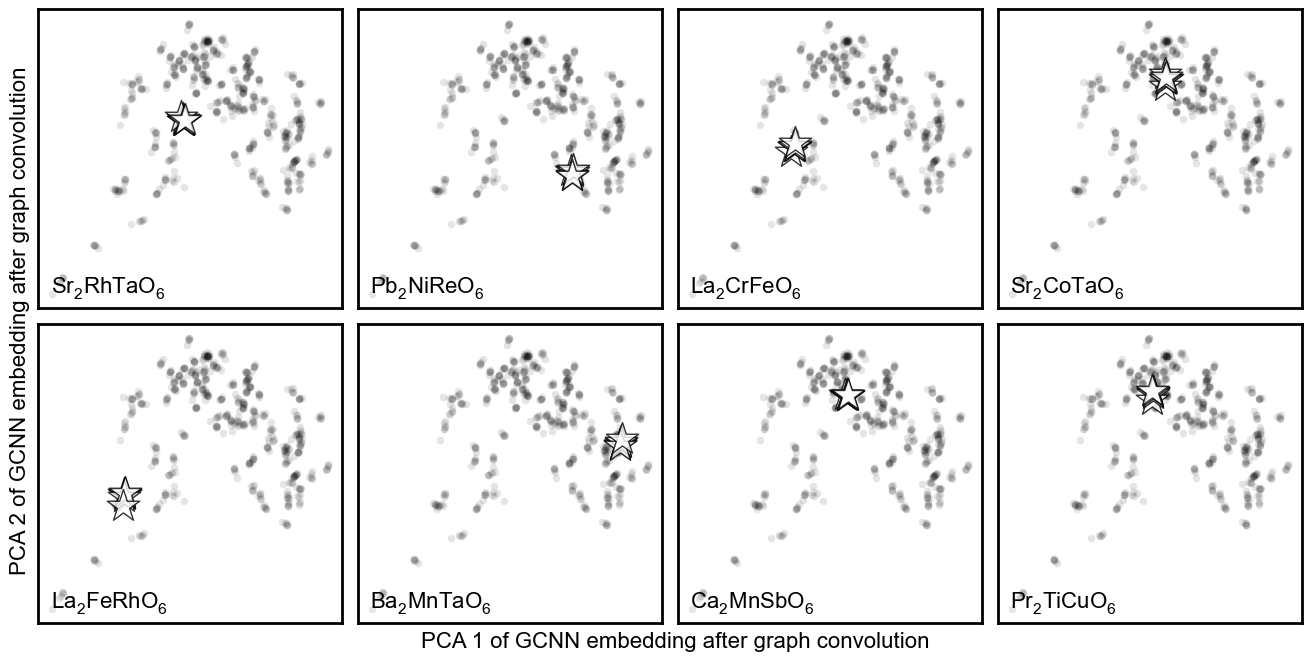

In [5]:
model_type = "CGCNN"
struct_type = "unrelaxed"

fig = plt.figure(figsize=(13, 6.5), constrained_layout=True)
axes = fig.subplots(nrows=2, ncols=4, gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

fig.supxlabel('PCA 1 of GCNN embedding after graph convolution', x=0.515, fontsize=16)
fig.supylabel('PCA 2 of GCNN embedding after graph convolution', y=0.515, fontsize=16)

for i in range(2):
    for j in range(4):
        ax_yaxis = axes[i][j].get_yaxis()
        ax_xaxis = axes[i][j].get_xaxis()
        ax_yaxis.set_visible(False)
        ax_xaxis.set_visible(False)
        axes[i][j].text(0.04, 0.05, selected_forms_formatted[i*4+j], horizontalalignment='left', fontsize=16, transform=axes[i][j].transAxes, color='black')
        plot_pca_embedding_additional(axes[i][j], model_type, struct_type, formula_to_entropy_dft, selected_forms_ranks[i*4+j])

# plt.tight_layout()
plt.savefig('./figures/SI_embedding_analysis_cgcnn_unrelaxed.pdf', bbox_inches='tight')

dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN
dft_e_hull_htvs_data_relaxed_CGCNN


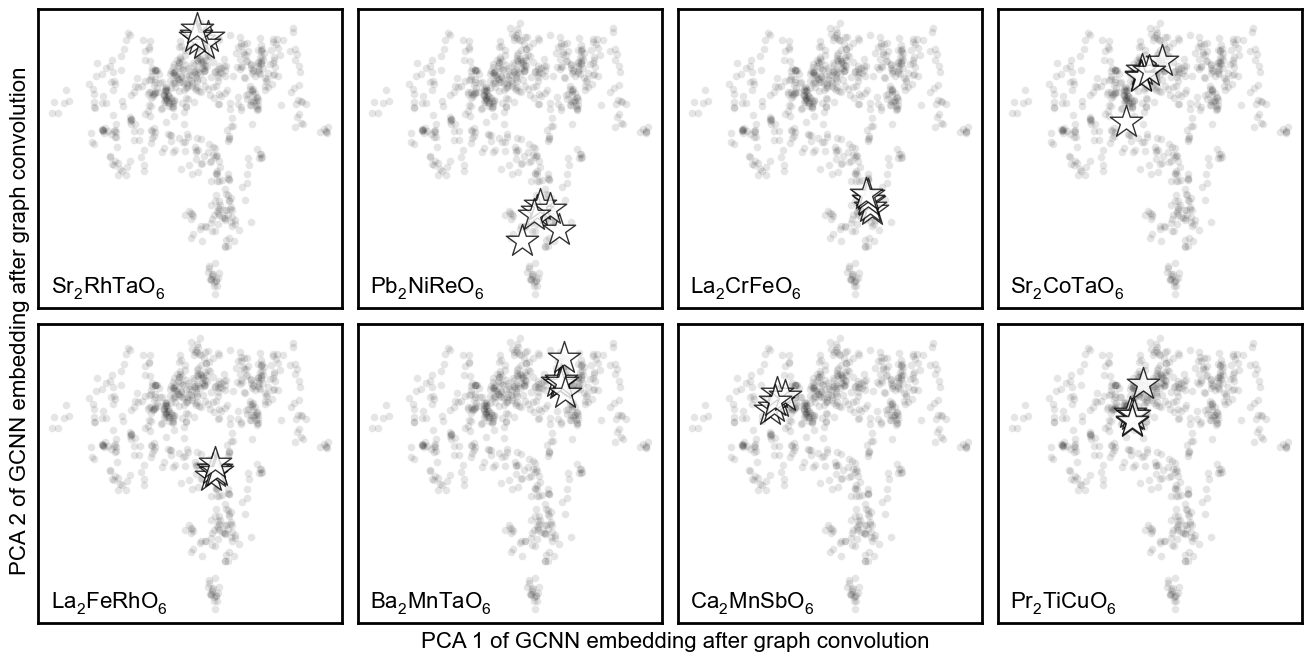

In [6]:
model_type = "CGCNN"
struct_type = "relaxed"

fig = plt.figure(figsize=(13, 6.5), constrained_layout=True)
axes = fig.subplots(nrows=2, ncols=4, gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

fig.supxlabel('PCA 1 of GCNN embedding after graph convolution', x=0.515, fontsize=16)
fig.supylabel('PCA 2 of GCNN embedding after graph convolution', y=0.515, fontsize=16)

for i in range(2):
    for j in range(4):
        ax_yaxis = axes[i][j].get_yaxis()
        ax_xaxis = axes[i][j].get_xaxis()
        ax_yaxis.set_visible(False)
        ax_xaxis.set_visible(False)
        axes[i][j].text(0.04, 0.05, selected_forms_formatted[i*4+j], horizontalalignment='left', fontsize=16, transform=axes[i][j].transAxes, color='black')
        plot_pca_embedding_additional(axes[i][j], model_type, struct_type, formula_to_entropy_dft, selected_forms_ranks[i*4+j])

# plt.tight_layout()
plt.savefig('./figures/SI_embedding_analysis_cgcnn_relaxed.pdf', bbox_inches='tight')

dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn
dft_e_hull_htvs_data_unrelaxed_e3nn


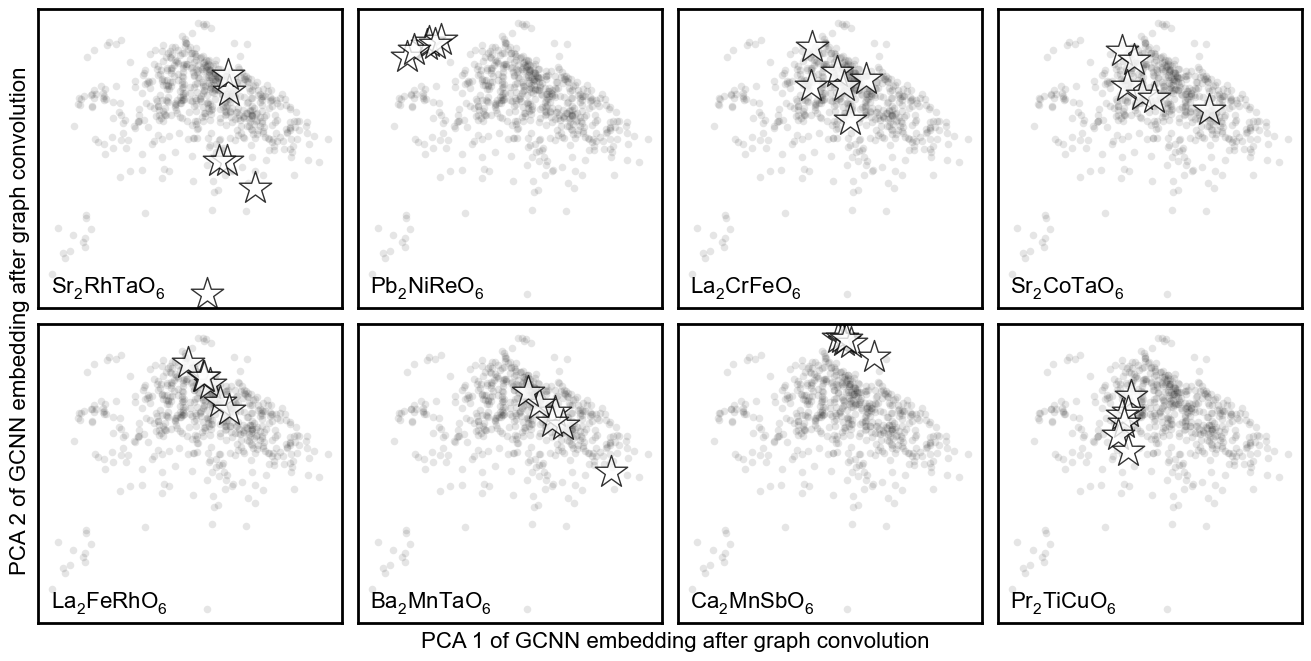

In [7]:
model_type = "e3nn"
struct_type = "unrelaxed"

fig = plt.figure(figsize=(13, 6.5), constrained_layout=True)
axes = fig.subplots(nrows=2, ncols=4, gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

fig.supxlabel('PCA 1 of GCNN embedding after graph convolution', x=0.515, fontsize=16)
fig.supylabel('PCA 2 of GCNN embedding after graph convolution', y=0.515, fontsize=16)

for i in range(2):
    for j in range(4):
        ax_yaxis = axes[i][j].get_yaxis()
        ax_xaxis = axes[i][j].get_xaxis()
        ax_yaxis.set_visible(False)
        ax_xaxis.set_visible(False)
        axes[i][j].text(0.04, 0.05, selected_forms_formatted[i*4+j], horizontalalignment='left', fontsize=16, transform=axes[i][j].transAxes, color='black')
        plot_pca_embedding_additional(axes[i][j], model_type, struct_type, formula_to_entropy_dft, selected_forms_ranks[i*4+j])

# plt.tight_layout()
plt.savefig('./figures/SI_embedding_analysis_e3nn_unrelaxed.pdf', bbox_inches='tight')

dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn
dft_e_hull_htvs_data_relaxed_e3nn


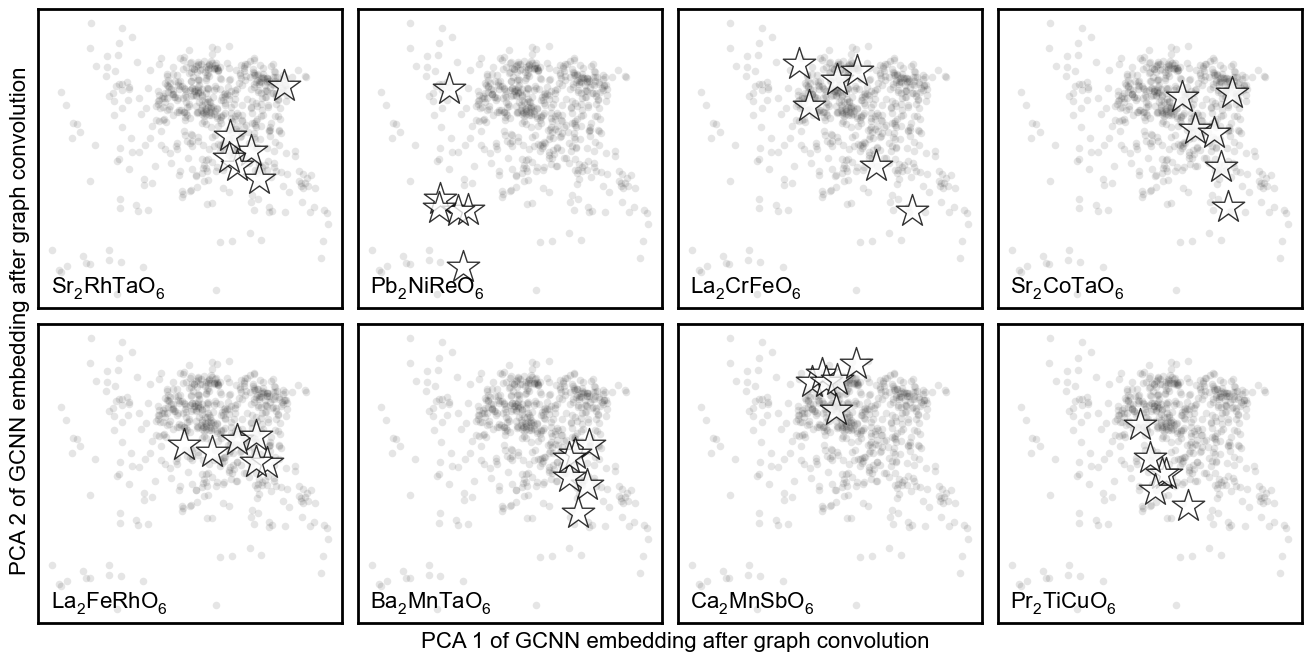

In [8]:
model_type = "e3nn"
struct_type = "relaxed"

fig = plt.figure(figsize=(13, 6.5), constrained_layout=True)
axes = fig.subplots(nrows=2, ncols=4, gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

fig.supxlabel('PCA 1 of GCNN embedding after graph convolution', x=0.515, fontsize=16)
fig.supylabel('PCA 2 of GCNN embedding after graph convolution', y=0.515, fontsize=16)

for i in range(2):
    for j in range(4):
        ax_yaxis = axes[i][j].get_yaxis()
        ax_xaxis = axes[i][j].get_xaxis()
        ax_yaxis.set_visible(False)
        ax_xaxis.set_visible(False)
        axes[i][j].text(0.04, 0.05, selected_forms_formatted[i*4+j], horizontalalignment='left', fontsize=16, transform=axes[i][j].transAxes, color='black')
        plot_pca_embedding_additional(axes[i][j], model_type, struct_type, formula_to_entropy_dft, selected_forms_ranks[i*4+j])

# plt.tight_layout()
plt.savefig('./figures/SI_embedding_analysis_e3nn_relaxed.pdf', bbox_inches='tight')

# SI_dataset_statistics

In [16]:
edge_data = pd.read_json('data/edge_dataset.json')
print('Number of ternary perovskite structures in the dataset:', edge_data.shape[0])

dataset_names = ['training_set', 'validation_set', 'test_set', 'holdout_set_B_sites', 'holdout_set_series']
# dataset_names = ['training_set', 'validation_set', 'test_set', 'holdout_set_B_sites']
for i in range(len(dataset_names)):
    if i == 0:
        temp_df = pd.read_json('data/'+dataset_names[i]+'.json')
    else:
        temp_df = pd.concat([temp_df, pd.read_json('data/'+dataset_names[i]+'.json')], ignore_index=True)
quaternary_count = 0
quinary_count = 0
for i in range(len(temp_df)):
    num_elements = len(temp_df.iloc[i].composition["sites"]['A']) + len(temp_df.iloc[i].composition["sites"]['B']) + len(temp_df.iloc[i].composition["sites"]['X'])
    if num_elements == 4:
        quaternary_count += 1
    elif num_elements == 5:
        quinary_count += 1
    else:
        raise ValueError('Number of elements in the compound ' + temp_df.iloc[i].composition["formula"] + ' is not 4 or 5')
print('Number of quaternary perovskite structures in the dataset:', quaternary_count)
print('Number of quinary perovskite structures in the dataset:', quinary_count)

Number of ternary perovskite structures in the dataset: 2659
Number of quaternary perovskite structures in the dataset: 2328
Number of quinary perovskite structures in the dataset: 5290


In [17]:
all_data_df = pd.concat([temp_df, edge_data], ignore_index=True)
A_site_counter = collections.Counter()
B_site_counter = collections.Counter()
for i in range(len(all_data_df)):
    for A_site in all_data_df.iloc[i].composition["sites"]["A"]:
        A_site_counter[A_site] += 1
    for B_site in all_data_df.iloc[i].composition["sites"]["B"]:
        B_site_counter[B_site] += 1

In [18]:
from bokeh.resources import INLINE
import bokeh.io
bokeh.io.output_notebook(INLINE)

Loading BokehJS ...

In [19]:
periodic_trends_plotter(counter=A_site_counter, cmap="plasma", width=800, height=400, output_filename='./figures/SI_dataset_statistics_A_stats.html')

figure(id='p1005', ...)

In [20]:
periodic_trends_plotter(counter=B_site_counter, cmap="plasma", width=800, height=400, output_filename='./figures/SI_dataset_statistics_B_stats.html')

figure(id='p1061', ...)

In [21]:
A_site_stoichiometry_counter = collections.Counter()
B_site_stoichiometry_counter = collections.Counter()
ordering_counter = collections.Counter()

for i in range(len(all_data_df)):
    if len(all_data_df.iloc[i].composition["sites"]["A"]) == 1 and len(all_data_df.iloc[i].composition["sites"]["B"]) == 1:
        A_site_stoichiometry_counter[0] += 1
        B_site_stoichiometry_counter[0] += 1
        ordering_counter[0] += 1
    else:
        A_0 = all_data_df.iloc[i].composition["sites"]["A"][0]
        A_0_stoichiometry = int(all_data_df.iloc[i].composition["composition"][A_0])
        if len(all_data_df.iloc[i].composition["sites"]["A"]) > 1:
            A_1 = all_data_df.iloc[i].composition["sites"]["A"][1]
            A_1_stoichiometry = int(all_data_df.iloc[i].composition["composition"][A_1])
        else:
            A_1_stoichiometry = 0
        assert A_0_stoichiometry + A_1_stoichiometry == 8
        A_site_stoichiometry_counter[4 - abs(4 - A_0_stoichiometry)] += 1

        B_0 = all_data_df.iloc[i].composition["sites"]["B"][0]
        B_0_stoichiometry = int(all_data_df.iloc[i].composition["composition"][B_0])
        if len(all_data_df.iloc[i].composition["sites"]["B"]) > 1:
            B_1 = all_data_df.iloc[i].composition["sites"]["B"][1]
            B_1_stoichiometry = int(all_data_df.iloc[i].composition["composition"][B_1])
        else:
            B_1_stoichiometry = 0
        assert B_0_stoichiometry + B_1_stoichiometry == 8
        B_site_stoichiometry_counter[4 - abs(4 - B_0_stoichiometry)] += 1

        ordering_count = min(len(all_data_df[all_data_df['formula'] == all_data_df.iloc[i]["formula"]]), 7)
        ordering_counter[ordering_count - 1] += 1

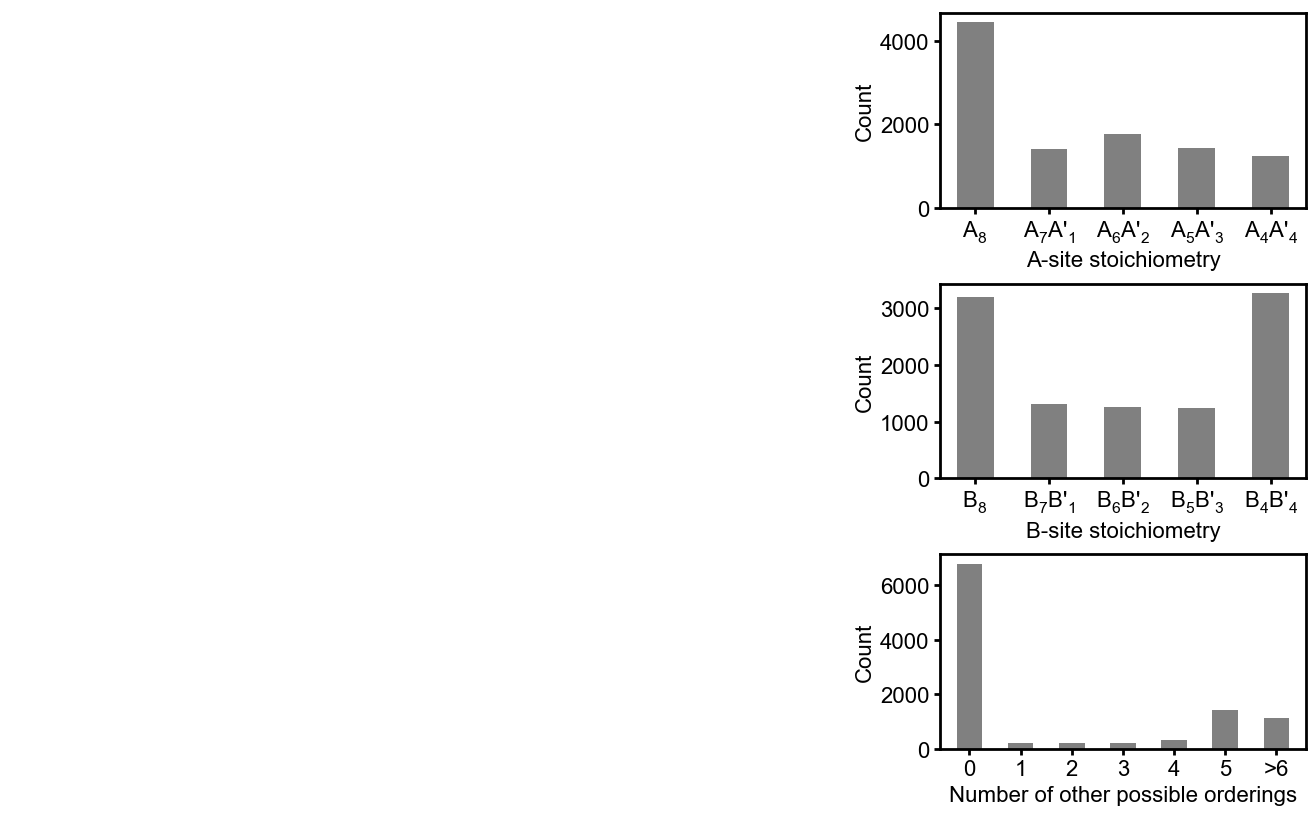

In [22]:
fig = plt.figure(figsize=(13, 8), constrained_layout=True)
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=[1.8, 1])

axes_r = subfig_r.subplots(nrows=3, ncols=1, gridspec_kw={'hspace': 0.05})

axes_r[0].bar(A_site_stoichiometry_counter.keys(), A_site_stoichiometry_counter.values(), width=0.5, color='grey')
axes_r[0].set_ylabel('Count')
axes_r[0].set_xlabel('A-site stoichiometry')
axes_r[0].set_xticks(range(0, 5))
axes_r[0].set_xticklabels(['A$_8$', 'A$_7$A\'$_1$', 'A$_6$A\'$_2$', 'A$_5$A\'$_3$', 'A$_4$A\'$_4$'])

axes_r[1].bar(B_site_stoichiometry_counter.keys(), B_site_stoichiometry_counter.values(), width=0.5, color='grey')
axes_r[1].set_ylabel('Count')
axes_r[1].set_xlabel('B-site stoichiometry')
axes_r[1].set_xticks(range(0, 5))
axes_r[1].set_xticklabels(['B$_8$', 'B$_7$B\'$_1$', 'B$_6$B\'$_2$', 'B$_5$B\'$_3$', 'B$_4$B\'$_4$'])

axes_r[2].bar(ordering_counter.keys(), ordering_counter.values(), width=0.5, color='grey')
axes_r[2].set_ylabel('Count')
axes_r[2].set_xlabel('Number of other possible orderings')
axes_r[2].set_xticks(range(0, 7))
axes_r[2].set_xticklabels(['0', '1', '2', '3', '4', '5', '>6'])

# plt.tight_layout()
plt.savefig('./figures/SI_dataset_statistics_bar.pdf', bbox_inches='tight')

# SI_interatomic_potentials

In [23]:
ehull_CGCNN_unrelaxed_test_0 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/test_set_predictions.json")
ehull_test_true = flatten(ehull_CGCNN_unrelaxed_test_0['dft_e_hull'])
ehull_test_M3GNet = flatten(ehull_CGCNN_unrelaxed_test_0['M3Gnet_relaxed_energy_per_atom']) - flatten(ehull_CGCNN_unrelaxed_test_0['dft_energy_per_atom']) + flatten(ehull_CGCNN_unrelaxed_test_0['dft_e_hull'])

ehull_CGCNN_unrelaxed_held_B_0 = pd.read_json("./best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")
diffs_dft = get_relative_vals(ehull_CGCNN_unrelaxed_held_B_0, ehull_CGCNN_unrelaxed_held_B_0.dft_e_hull)
diffs_M3GNet = get_relative_vals(ehull_CGCNN_unrelaxed_held_B_0, ehull_CGCNN_unrelaxed_held_B_0.M3Gnet_relaxed_energy_per_atom)

ehull_CGCNN_unrelaxed_test_0['CHGNet_relaxed_energy'] = None
for i in range(len(ehull_CGCNN_unrelaxed_test_0)):
    curr_row = ehull_CGCNN_unrelaxed_test_0.iloc[i]
    curr_id = curr_row['unrelaxed_cryst_id']
    with open("./inference/James_Scrap/Stored_Opt/CHGnet_traj" + str(curr_id), "rb") as f:
        relax_data = pickle.load(f)
        ehull_CGCNN_unrelaxed_test_0.at[i, 'CHGNet_relaxed_energy'] = relax_data["energy"][-1]

ehull_CGCNN_unrelaxed_held_B_0['CHGNet_relaxed_energy'] = None
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    curr_row = ehull_CGCNN_unrelaxed_held_B_0.iloc[i]
    curr_id = curr_row['unrelaxed_cryst_id']
    with open("./inference/James_Scrap/Stored_Opt/CHGnet_traj" + str(curr_id), "rb") as f:
        relax_data = pickle.load(f)
        ehull_CGCNN_unrelaxed_held_B_0.at[i, 'CHGNet_relaxed_energy'] = relax_data["energy"][-1]

In [24]:
import re
from pymatgen.entries.computed_entries import ComputedEntry
from inference.James_Scrap.MP_custom_corrections import MaterialsProject2020Custom
from pymatgen.core import Structure


def get_elements(formula):
    elements = re.findall(r'([A-Z][a-z]?)', formula)
    return set(elements)


def get_run_type(formula):
    elements = get_elements(formula)
    U_elements = ["V", "Cr", "Mn", "Fe", "Co", "Ni", "W", "Mo"]
    if "O" in elements:
        for U_element in U_elements:
            if U_element in elements:
                return "GGA+U"
        
    return "GGA"


def get_u_settings(formula):
    elements = get_elements(formula)
    if "F" in elements:
        return {"Co": 3.32, "Cr": 3.7, "Fe": 5.3, "Mn": 3.9, "Mo": 4.38, "Ni": 6.2, "V": 3.25, "W": 6.2}
    elif "O" in elements:
        return {"Co": 3.32, "Cr": 3.7, "Fe": 5.3, "Mn": 3.9, "Mo": 4.38, "Ni": 6.2, "V": 3.25, "W": 6.2}
    else:
        return {}


def get_entry(datapoint):
    comp = Structure.from_dict(datapoint["unrelaxed_struct"]).composition
    energy = datapoint["dft_energy"]
    formula = comp.formula
    return ComputedEntry(comp, energy, parameters = {"potcar_symbols": [], "run_type": get_run_type(formula), "hubbards": get_u_settings(formula)})

In [25]:
compat = MaterialsProject2020Custom()

ehull_CGCNN_unrelaxed_test_0['CHGNet_energy_correction'] = None
for i in range(len(ehull_CGCNN_unrelaxed_test_0)):
    summed_adjustment = 0
    entry = get_entry(ehull_CGCNN_unrelaxed_test_0.iloc[i])
    adjustments = compat.get_adjustments(entry)
    for adjustment in adjustments:
        summed_adjustment += adjustment.value
    ehull_CGCNN_unrelaxed_test_0.at[i, 'CHGNet_energy_correction'] = summed_adjustment
ehull_CGCNN_unrelaxed_test_0['CHGNet_relaxed_energy_per_atom_corrected'] = (ehull_CGCNN_unrelaxed_test_0['CHGNet_relaxed_energy'] - ehull_CGCNN_unrelaxed_test_0['CHGNet_energy_correction']) / 40.0

ehull_CGCNN_unrelaxed_held_B_0['CHGNet_energy_correction'] = None
for i in range(len(ehull_CGCNN_unrelaxed_held_B_0)):
    summed_adjustment = 0
    entry = get_entry(ehull_CGCNN_unrelaxed_held_B_0.iloc[i])
    adjustments = compat.get_adjustments(entry)
    for adjustment in adjustments:
        summed_adjustment += adjustment.value
    ehull_CGCNN_unrelaxed_held_B_0.at[i, 'CHGNet_energy_correction'] = summed_adjustment
ehull_CGCNN_unrelaxed_held_B_0['CHGNet_relaxed_energy_per_atom_corrected'] = (ehull_CGCNN_unrelaxed_held_B_0['CHGNet_relaxed_energy'] - ehull_CGCNN_unrelaxed_held_B_0['CHGNet_energy_correction']) / 40.0

/home/jypeng/publication_repos/PerovskiteOrderingGCNNs/inference/James_Scrap/MP_custom_corrections.py:182: UserWarning: No structure or oxide_type parameter present. Note that peroxide/superoxide corrections are not as reliable and relies only on detection of special formulas, e.g., Li2O2.
  warnings.warn(
/home/jypeng/publication_repos/PerovskiteOrderingGCNNs/inference/James_Scrap/MP_custom_corrections.py:234: UserWarning: Failed to guess oxidation states for Entry None (Ba3Ca5CoNi7O24). Assigning anion correction to only the most electronegative atom.
  warnings.warn(
/home/jypeng/publication_repos/PerovskiteOrderingGCNNs/inference/James_Scrap/MP_custom_corrections.py:234: UserWarning: Failed to guess oxidation states for Entry None (Ba3Ca5Mn3Ni5O24). Assigning anion correction to only the most electronegative atom.
  warnings.warn(
/home/jypeng/publication_repos/PerovskiteOrderingGCNNs/inference/James_Scrap/MP_custom_corrections.py:234: UserWarning: Failed to guess oxidation states 

In [26]:
ehull_test_CHGNet = flatten(ehull_CGCNN_unrelaxed_test_0['CHGNet_relaxed_energy_per_atom_corrected']) - flatten(ehull_CGCNN_unrelaxed_test_0['dft_energy_per_atom']) + flatten(ehull_CGCNN_unrelaxed_test_0['dft_e_hull'])
diffs_CHGNet = get_relative_vals(ehull_CGCNN_unrelaxed_held_B_0, ehull_CGCNN_unrelaxed_held_B_0.CHGNet_relaxed_energy_per_atom_corrected)

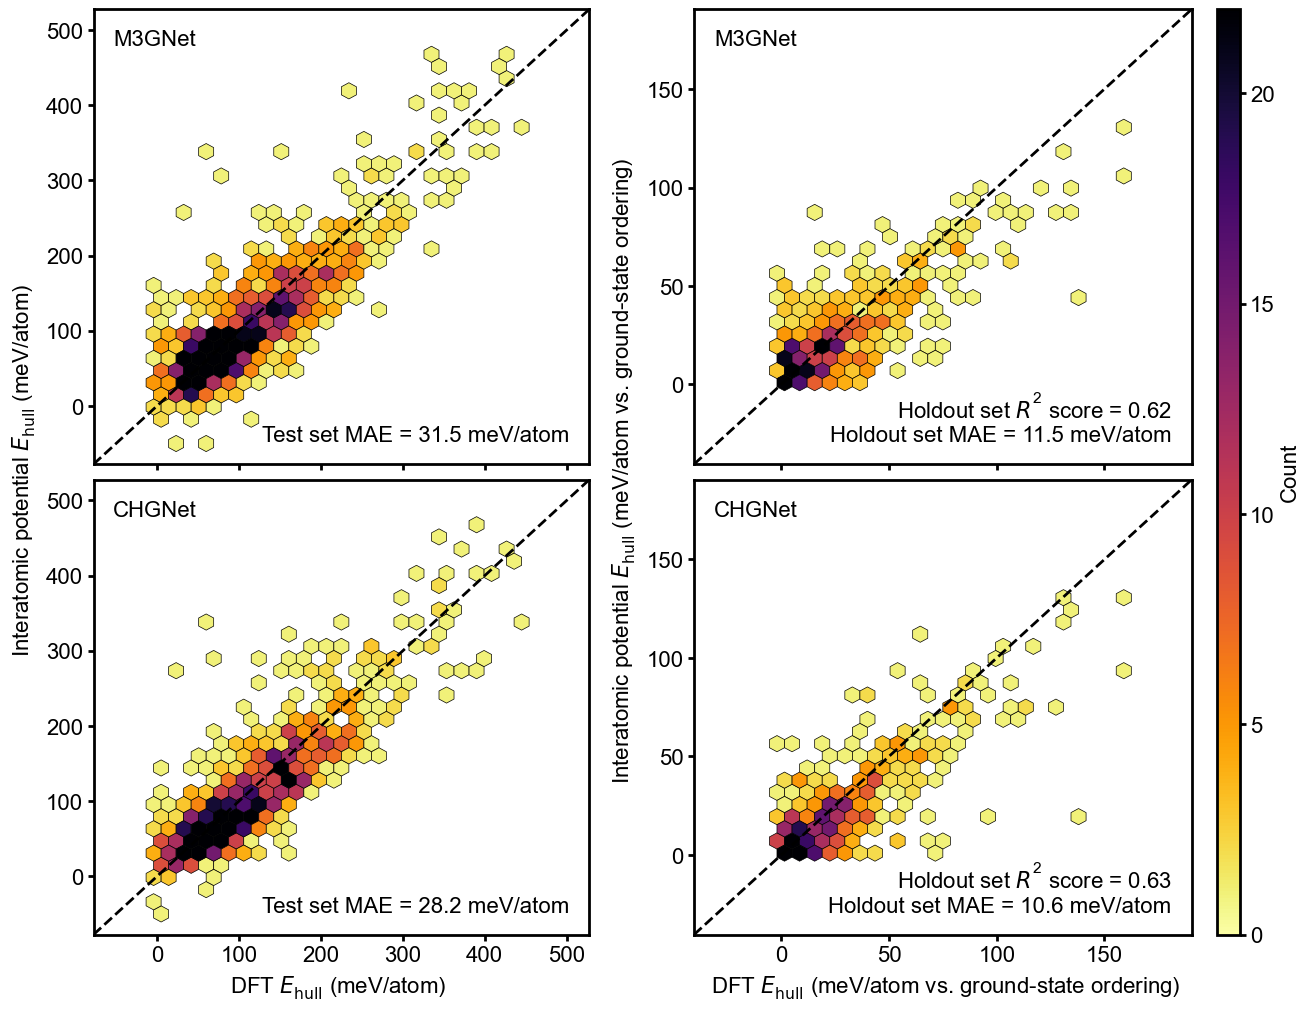

In [27]:
fig = plt.figure(figsize=(13, 10), constrained_layout=True)
(subfig_l, subfig_r) = fig.subfigures(nrows=1, ncols=2, width_ratios=[0.84, 1])
axes_l = subfig_l.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
axes_r = subfig_r.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

hex_cmap = 'inferno_r'
hex_gridsize = 30
hex_mincnt = 1
hex_edgecolors = 'black'
hex_linewidths = 0.5
cbar_vmax = 22

hex_xylim = [-50, 500]
axes_l[0].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[0].hexbin(
    ehull_test_true*1000, ehull_test_M3GNet*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)
axes_l[0].text(0.04, 0.92, 'M3GNet', horizontalalignment='left', fontsize=16, transform=axes_l[0].transAxes)
axes_l[0].text(0.96, 0.05, 'Test set MAE = {:.1f} meV/atom'.format(mean_absolute_error(ehull_test_true, ehull_test_M3GNet)*1000), horizontalalignment='right', fontsize=16, transform=axes_l[0].transAxes)
axes_l[1].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_l[1].hexbin(
    ehull_test_true*1000, ehull_test_CHGNet*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)
axes_l[1].text(0.04, 0.92, 'CHGNet', horizontalalignment='left', fontsize=16, transform=axes_l[1].transAxes)
axes_l[1].text(0.96, 0.05, 'Test set MAE = {:.1f} meV/atom'.format(mean_absolute_error(ehull_test_true, ehull_test_CHGNet)*1000), horizontalalignment='right', fontsize=16, transform=axes_l[1].transAxes)
subfig_l.supxlabel('DFT $\mathit{E}_{\mathrm{hull}}$ (meV/atom)', x=0.565, fontsize=16)
subfig_l.supylabel('Interatomic potential $\mathit{E}_{\mathrm{hull}}$ (meV/atom)', y=0.535, fontsize=16)

hex_xylim = [-30, 180]
axes_r[0].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
axes_r[0].hexbin(
    diffs_dft*1000, diffs_M3GNet*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)
axes_r[0].text(0.04, 0.92, 'M3GNet', horizontalalignment='left', fontsize=16, transform=axes_r[0].transAxes)
axes_r[0].text(0.96, 0.05, 'Holdout set $\mathit{{R}}^2$ score = {:.2f}\nHoldout set MAE = {:.1f} meV/atom'.format(r2_score(diffs_dft, diffs_M3GNet), mean_absolute_error(diffs_dft, diffs_M3GNet)*1000), horizontalalignment='right', fontsize=16, transform=axes_r[0].transAxes)
axes_r[1].axline((hex_xylim[0], hex_xylim[0]), (hex_xylim[1], hex_xylim[1]), color='black', linestyle='--', linewidth=2)
hex_example = axes_r[1].hexbin(
    diffs_dft*1000, diffs_CHGNet*1000,
    cmap=hex_cmap, gridsize=hex_gridsize, mincnt=hex_mincnt, edgecolors=hex_edgecolors, linewidths=hex_linewidths,
    extent=hex_xylim + hex_xylim, vmin=0, vmax=cbar_vmax,
)
axes_r[1].text(0.04, 0.92, 'CHGNet', horizontalalignment='left', fontsize=16, transform=axes_r[1].transAxes)
axes_r[1].text(0.96, 0.05, 'Holdout set $\mathit{{R}}^2$ score = {:.2f}\nHoldout set MAE = {:.1f} meV/atom'.format(r2_score(diffs_dft, diffs_CHGNet), mean_absolute_error(diffs_dft, diffs_CHGNet)*1000), horizontalalignment='right', fontsize=16, transform=axes_r[1].transAxes)
subfig_r.supxlabel('DFT $\mathit{E}_{\mathrm{hull}}$ (meV/atom vs. ground-state ordering)', x=0.485, fontsize=16)
subfig_r.supylabel('Interatomic potential $\mathit{E}_{\mathrm{hull}}$ (meV/atom vs. ground-state ordering)', y=0.535, fontsize=16)

subfig_r.colorbar(hex_example, ax=axes_r, ticks=np.arange(0, cbar_vmax+1, 5), label='Count', aspect=40)

# plt.tight_layout()
plt.savefig('./figures/SI_interatomic_potentials.pdf', bbox_inches='tight')